In [1]:
#para importar rut
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

In [2]:
#--------------->para ver archivos de drive
# Load the Drive helper and mount 
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#-------------->Para ver archivos de drive
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'Colab Notebooks'
'Copia de BasicAnalysis.ipynb'
'Copia de BasicPyROOTExample.ipynb'
'Copia de Chi2Fitting (1).ipynb'
'Copia de Chi2Fitting.ipynb'
'Copia de Data5.root'
'Copia de DatosResonancia.root'
'Copia de FFT_imagen.ipynb'
'Copia de FFT.ipynb'
'Copia de FLUTEMI.WAV'
'Copia de HistogrammingInROOT.ipynb'
'Copia de monje-a-lo-bonzo-blanco-y-negro.png'
'Copia de N1214727927.root'
'Copia de piano-C5.wav'
'Copia de root_build_google_yikes.tar'
'Copia de TrimmedTree.root'
'Copia de TTreeExcercise (1).ipynb'
'Copia de TTreeExcercise.ipynb'
 Datos1.root
 Datos2.root
 Datos3.root
 Datos4.root
 Datos5.root
 Datos6.root
 Reto1.ipynb
'Traduccion estadistica.gdoc'


In [0]:
#para importar rut
!tar -xf /content/drive/My\ Drive/Copia\ de\ root_build_google_yikes.tar 

In [5]:
#Para importar rut
!ls -ltrh 

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 18 02:44 drive


In [0]:
#para importar rut
import sys 
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
#importo paqueterias
import ROOT 
import numpy as np
from random import random 
from scipy import integrate
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style


Welcome to JupyROOT 6.14/04


In [8]:
#importo datos de la cedula
DataChain=ROOT.TChain("SystemTree") 
DataChain.Add("/content/drive/My Drive/Copia de N1214727927.root")

1

In [9]:
#numero de eventos a analizar
NumberOfEventsToCheck=DataChain.GetEntries() 
print("We are going to analyze ",NumberOfEventsToCheck, " events")

We are going to analyze  80000  events


<ROOT.TH1F object ("Hist ") at 0x7e4dc00>


Warning in <TROOT::Append>: Replacing existing TH1: Hist  (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


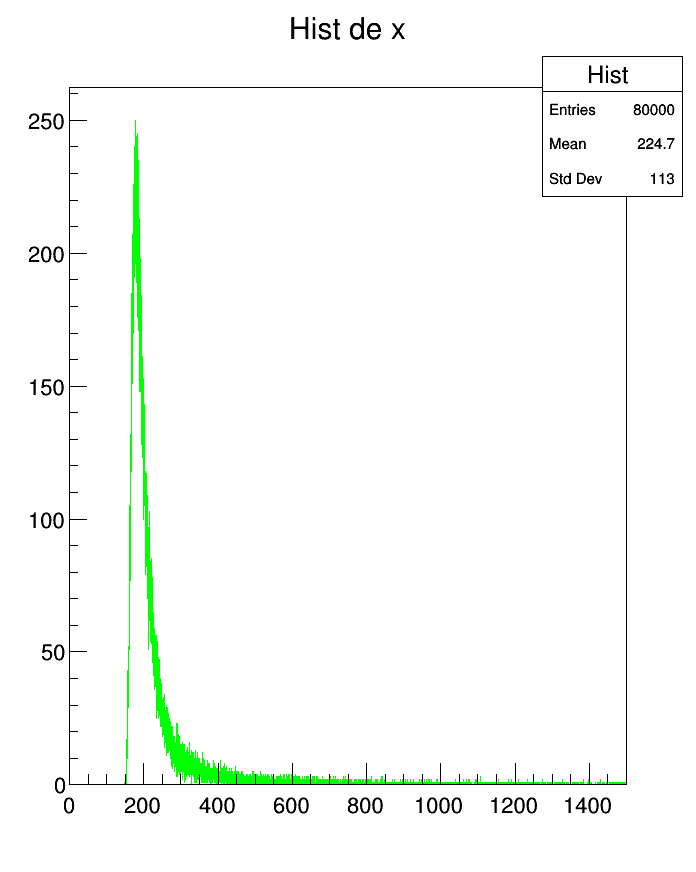

In [33]:
#realizo histograma punto 1
Hist= ROOT.TH1F( 'Hist ', 'Hist de x', 10000, 0 , 1500 )
for entry in DataChain:
  var=entry.x
  Hist.Fill(var)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist.Draw()
Hist.SetLineColor(3)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()
print(Hist)


In [0]:
#Comenzamos a resolver punto 2 (algoritmo de metropolis)--> con ROOT.Math.Landau
#Comenzamos a implementar algoritmo de metropolis 
N=80000# tamaño de la muestra 
X1=[]
X2=[]
limix=150
limfx=1500

x01=(limfx-limix)*random()+limix #para ir corriendo en paralelo 
x02=(limfx-limix)*random()+limix
X1.append(x01)
X2.append(x02)
Mu=224.7
cu=113

In [0]:
while ((len(X1)+len(X2))<N):

    xp1=(limfx-limix)*random()+limix
    deltas1=-1*np.log(ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True))

    xp2=(limfx-limix)*random()+limix
    deltas2=-1*np.log(ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True))

    if deltas1<0 and deltas2<0:
      xu1=xp1
      X1.append(xu1)
      if ((len(X1)+len(X2))>=N):
          break
      xu2=xp2
      X2.append(xu2)

    if deltas1<0 and deltas2>0:
      xu1=xp1
      X1.append(xu1)
      if ((len(X1)+len(X2))>=N):
          break
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)

    if deltas1>0 and deltas2<0:
      xu2=xp2
      X2.append(xu2)
      if ((len(X1)+len(X2))>=N):
          break
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)
        
    if deltas1>0 and deltas2>0:
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)
        if ((len(X1)+len(X2))>=N):
          break
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)

80000


Warning in <TROOT::Append>: Replacing existing TH1: Hist2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


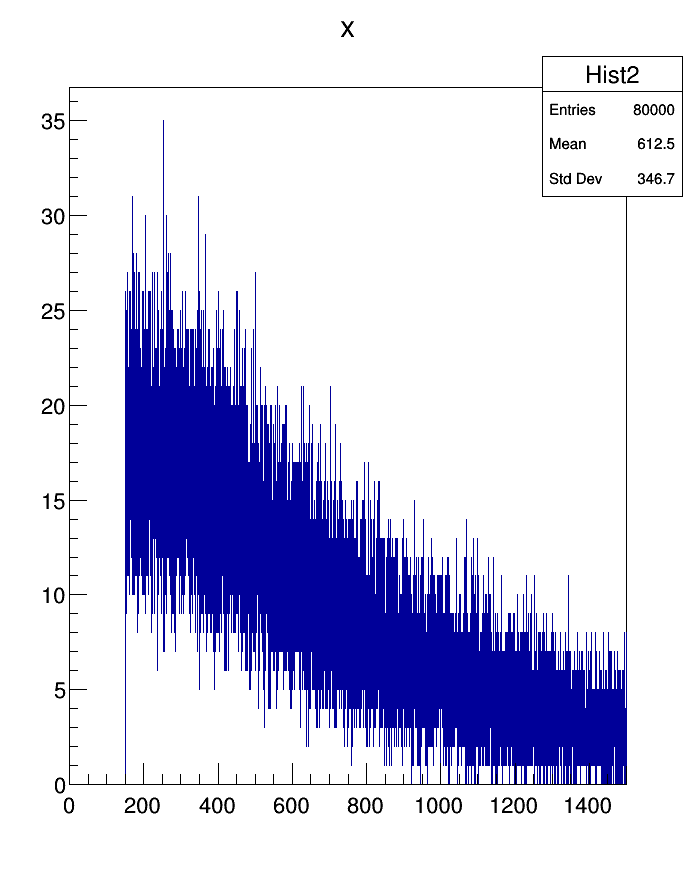

In [16]:
#Graficamos el histograma de la muestra generado con alg de metropolis
print(len(X1)+len(X2))

X=X1+X2 #union de datos 
Hist2= ROOT.TH1F( 'Hist2', 'x', 10000, 0 , 1500 )
for i in X:
  Hist2.Fill(i)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist2.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [0]:
#Comenzamos a resolver punto 2 (algoritmo de metropolis) Por metodo integrate de la funcion PDf
#definamos la funcion que va ser integrada para dar la PDF
def prolandau(t,y,mu,c):
  const1=1/(np.pi*c)
  arg1=-1*t
  arg2= t*((y-mu)/c)+(2*t*np.log(t/c))/np.pi
  func=const1*np.exp(arg1)*np.cos(arg2)
  return func

In [16]:
#Segunda forma de hacer metropolis con integrate--> OJO es muy lento aun asi tener encuenta
#Comenzamos a implementar algoritmo de metropolis 
N=80000# tamaño de la muestra 
X1=[]
X2=[]
limix=150
limfx=1500

x01=(limfx-limix)*random()+limix
x02=(limfx-limix)*random()+limix
X1.append(x01)
X2.append(x02)
Mu=224.7
cu=113

while ((len(X1)+len(X2))<N):

    xp1=(limfx-limix)*random()+limix
    deltas1=-1*np.log(integrate.quad(prolandau,0,np.inf,args=(xp1,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X1[-1],Mu,cu))[0])

    xp2=(limfx-limix)*random()+limix
    deltas2=-1*np.log(integrate.quad(prolandau,0,np.inf,args=(xp2,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X2[-1],Mu,cu))[0])

    if deltas1<0 and deltas2<0:
      xu1=xp1
      X1.append(xu1)
      xu2=xp2
      X2.append(xu2)

    if deltas1<0 and deltas2>0:
      xu1=xp1
      X1.append(xu1)
      r2=random()
      Pron2=integrate.quad(prolandau,0,np.inf,args=(xp2,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X2[-1],Mu,cu))[0]
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)

    if deltas1>0 and deltas2<0:
      xu2=xp2
      X2.append(xu2)
      r1=random()
      Pron1=integrate.quad(prolandau,0,np.inf,args=(xp1,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X1[-1],Mu,cu))[0]
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)
        
    if deltas1>0 and deltas2>0:
      r1=random()
      Pron1=integrate.quad(prolandau,0,np.inf,args=(xp1,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X1[-1],Mu,cu))[0]
      r2=random()
      Pron2=integrate.quad(prolandau,0,np.inf,args=(xp2,Mu,cu))[0]/integrate.quad(prolandau,0,np.inf,args=(X2[-1],Mu,cu))[0]
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


39909
40091
80000


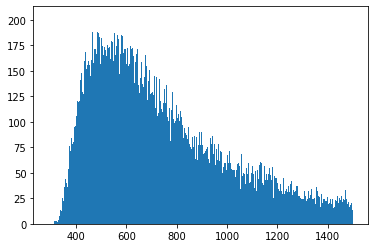

In [17]:
#Graficamos el histograma de la muestra generado con alg de metropolis

X=X1+X2 #union de datos 
print(len(X))
plt.hist(X,bins=10000)
plt.show()

In [35]:
#Comenzamos a resolver punto 3

#vamos a generar varias muestras con metropolis para diferentes mu y c y luego comparar con los datos suministrados por el profesor
#y observar cual de todos produce el mejor chi^2
N=80000 # tamaño de la muestra 

XT=[] #matriz donde vamos a guardar todas las muestras producidas con alg de metropolis para diferentes mu y c
limix=150
limfx=1500

mu0=140
muf=200
c0=1
cf=30
Nmyc=20 #numero de elementos que tiene la lista MU y C
MU=np.linspace(mu0,muf,Nmyc) #definimos una lista de valores de mu --->ojo cambiar el Nmyc pues son muy pocos valores
C=np.linspace(c0,cf,Nmyc) #definimos una lista de valores de c

print(MU)
print(C)

[140.         143.15789474 146.31578947 149.47368421 152.63157895
 155.78947368 158.94736842 162.10526316 165.26315789 168.42105263
 171.57894737 174.73684211 177.89473684 181.05263158 184.21052632
 187.36842105 190.52631579 193.68421053 196.84210526 200.        ]
[ 1.          2.52631579  4.05263158  5.57894737  7.10526316  8.63157895
 10.15789474 11.68421053 13.21052632 14.73684211 16.26315789 17.78947368
 19.31578947 20.84210526 22.36842105 23.89473684 25.42105263 26.94736842
 28.47368421 30.        ]


In [36]:
#implementamos alg de metropolis pero donde vamos a ir variando en cada for mu y c, es decir, 
#cuando se termina el while tengo una muestra con un mu y c dado. Luego cambio tanto mu y c y vuelvo a producir otra muestra dentro del while 
#y asi sucesivamente 
for j in MU:
  for k in C:
    X1=[]
    X2=[]
    x01=(limfx-limix)*random()+limix
    x02=(limfx-limix)*random()+limix
    X1.append(x01)
    X2.append(x02)
    while ((len(X1)+len(X2))<N):
      xp1=(limfx-limix)*random()+limix
      deltas1=-1*np.log(ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True))

      xp2=(limfx-limix)*random()+limix
      deltas2=-1*np.log(ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True))

      if deltas1<0 and deltas2<0:
        xu1=xp1
        X1.append(xu1)
        if ((len(X1)+len(X2))>=N):
          break
        xu2=xp2
        X2.append(xu2)
      if deltas1<0 and deltas2>0:
        xu1=xp1
        X1.append(xu1)
        if ((len(X1)+len(X2))>=N):
          break
        r2=random()
        Pron2=ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True)
        if r2<Pron2:
          xu2=xp2
          X2.append(xu2)
      if deltas1>0 and deltas2<0:
        xu2=xp2
        X2.append(xu2)
        if ((len(X1)+len(X2))>=N):
          break
        r1=random()
        Pron1=ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True)
        if r1<Pron1:
          xu1=xp1
          X1.append(xu1)
      if deltas1>0 and deltas2>0:
        r1=random()
        Pron1=ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True)
        r2=random()
        Pron2=ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True)
        if r2<Pron2:
          xu2=xp2
          X2.append(xu2)
          if ((len(X1)+len(X2))>=N):
            break
        if r1<Pron1:
          xu1=xp1
          X1.append(xu1)
    X=X1+X2

    XT.append(X)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [37]:
print(len(XT))
print(len(XT[2]))

400
80000


In [38]:
b=Hist.GetNbinsX()+1 #numero de bines 
print(b)
FullChi2 = [] #matriz donde voy a guardar los diferentes valores de chi^2/ndf para diferentes valores de mu y c
for l in range(len(XT)): #este for me toma una muestra con un mu y c determinado
  chi2=0.0 
  for z in range(b): #este for es para la suma de la funcion chi^2
    if Hist.GetBinContent(z)!=0: #si el dato z-esimo es diferente de cero realice lo sgte es para no dividir por cero
      chi2+=((Hist.GetBinContent(z)-XT[l][z])**2)/Hist.GetBinContent(z) #chi^2=sum[(dato(i)-metropolis(i))^2/dato(i)] donde sum va de 1 hasta ndf que es el numero de bins
  chi2ndf=chi2/b 
  FullChi2.append(chi2ndf)
print(FullChi2)
print(len(FullChi2))

10001
[42158.833339120145, 46133.796535011366, 42658.1682514733, 48495.57632599872, 45770.46390650057, 47498.32141805446, 48737.84522769623, 48017.48827323663, 51725.99065626016, 55744.46029380545, 48814.624463583044, 60771.68789752675, 57710.33870299924, 58125.12520645856, 59445.30509539009, 58538.648538715635, 58667.694720038286, 64487.30513288204, 63416.93439679672, 63707.89738280032, 42436.17355551006, 43700.11151975917, 42653.8103236192, 44625.16862559828, 48397.23608549997, 48064.919859649504, 46304.748502176626, 55432.16189954739, 49498.11110990181, 52805.30497955289, 54407.87349951714, 55844.18332886541, 60215.14153738963, 58095.27542576821, 58017.18823454646, 59232.5542326514, 61116.22575588987, 61701.82339930684, 62490.47336867411, 63917.09510579188, 39377.690385360016, 38453.65913738845, 37894.21842128346, 43237.93368194575, 41937.34044192045, 48313.008006940356, 49524.73265492516, 46646.92803518467, 52463.388060558114, 48332.44351919125, 54191.00174387314, 49469.78138798018

In [39]:
mini=min(FullChi2)
pos=FullChi2.index(mini)
print("minimo de chi^2/ndf=",mini)
print("pos",pos) #la posicion la necesito para saber a que mu y c corresponde de la lista de MU y C

minimo de chi^2/ndf= 25310.507916310136
pos 180


In [41]:
#valores optimos 
print(MU[9]) 
print(C[0])

168.42105263157896
1.0


In [42]:
#Organizar para producto carteasiano
Z,W=np.meshgrid(C, MU)
print(Z.shape) #C
print(W.shape) #MU
#print(len(W))
MUU=[]
CUU=[]
for i in range(len(W)):
    for j in range(len(W)):
        WW=W[i,j]
        CC=Z[i,j]
        MUU.append(WW)
        CUU.append(CC)
    
print(len(MUU))
print(MUU)
print(len(CUU))
print(CUU)

(20, 20)
(20, 20)
400
[140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 143.1578947368421, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 146.31578947368422, 149.4736842105263, 149.4736842105263, 149.4736842105263, 

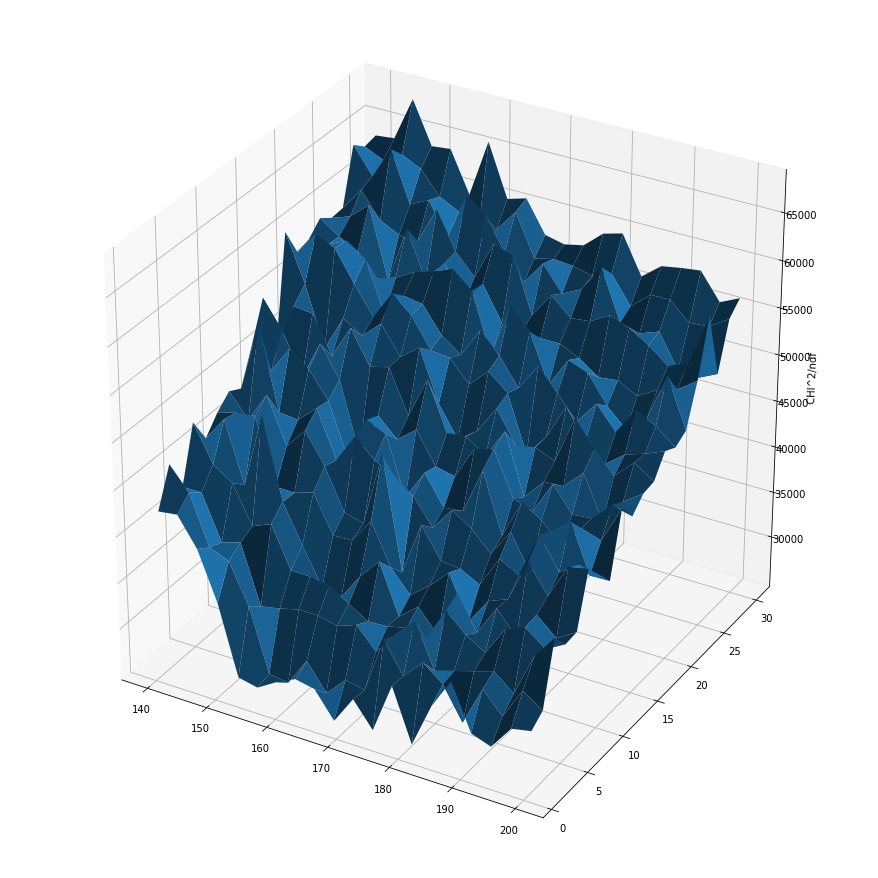

In [43]:
FullChi2N=np.array(FullChi2)
FullChi2N=np.reshape(FullChi2N,(20,20))
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
Q, T = np.meshgrid(C, MU)
 
ax.plot_surface(T, Q, FullChi2N, rstride=1, cstride=1)
ax.set_zlabel(' CHI^2/ndf')
show()

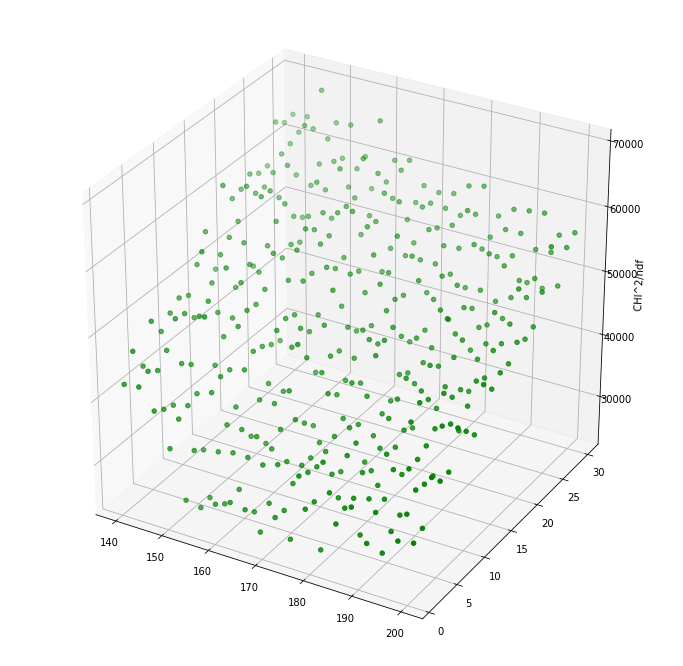

In [44]:
#Grafica de puntos

fig = plt.figure(figsize=(12,12))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
# Agregamos los puntos en el plano 3D
ax1.scatter(MUU, CUU, FullChi2, c='g', marker='o')
ax1.set_zlabel(' CHI^2/ndf')
plt.show()

 A PARTIR DE ACA COMENZAMOS A ELABORAR PARA MU Y C OPTIMOS

In [0]:
#Comenzamos a resolver punto 2 (algoritmo de metropolis) con ROOT.Math.Landau y mu y c optimos
#Comenzamos a implementar algoritmo de metropolis ¿?
N=80000#tamaño de la muestra 
X1=[]
X2=[]
limix=150
limfx=1500

x01=(limfx-limix)*random()+limix #para ir corriendo en paralelo 
x02=(limfx-limix)*random()+limix
X1.append(x01)
X2.append(x02)

Mu=168.42105263157896 #optimos 
cu=1

In [46]:
while ((len(X1)+len(X2))<N):

    xp1=(limfx-limix)*random()+limix
    deltas1=-1*np.log(ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True))

    xp2=(limfx-limix)*random()+limix
    deltas2=-1*np.log(ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True))

    if deltas1<0 and deltas2<0:
      xu1=xp1
      X1.append(xu1)
      xu2=xp2
      X2.append(xu2)

    if deltas1<0 and deltas2>0:
      xu1=xp1
      X1.append(xu1)
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)

    if deltas1>0 and deltas2<0:
      xu2=xp2
      X2.append(xu2)
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)
        
    if deltas1>0 and deltas2>0:
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


40351
39649


Warning in <TROOT::Append>: Replacing existing TH1: Hist3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


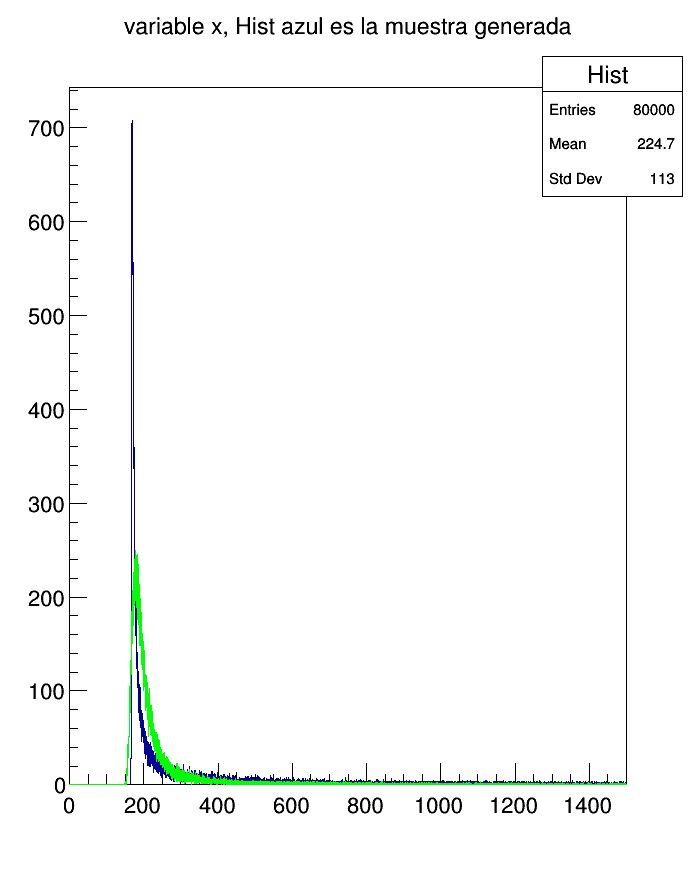

In [47]:
#Graficamos mejor muestra

print(len(X1))
print(len(X2))

X=X1+X2 #union de datos 

Hist3= ROOT.TH1F( 'Hist3', 'variable x, Hist azul es la muestra generada', 10000, 0 , 1500 )
for i in X:
  Hist3.Fill(i)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist3.Draw()
Hist.Draw('same')
Hist.SetLineColor(3)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()